<a href="https://colab.research.google.com/github/nishnarudkar/AI-Chatbot/blob/main/Classification_Model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # Upload dataset from local machine



Saving Solar_radiation_classification.csv to Solar_radiation_classification.csv


In [5]:
import pandas as pd

# Load the dataset
file_path = '/content/Solar_radiation_classification.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.head())  # Show the first few rows
print(df.info())  # Display column details


   Air Temperature (C°)  Air Temperature Uncertainty (C°)  \
0              1.232271                         -0.039841   
1              0.823413                         -0.039841   
2             -0.078894                         -0.039841   
3             -0.924807                         -0.039841   
4             -1.714325                         -0.039841   

   Wind Direction at 3m (°N)  Wind Direction at 3m Uncertainty (°N)  \
0                  -1.325218                               0.163933   
1                  -1.025486                               0.163933   
2                  -0.875620                               0.163933   
3                  -1.000508                               1.188516   
4                  -0.983856                               0.163933   

   Wind Speed at 3m (m/s)  Wind Speed at 3m Uncertainty (m/s)  \
0               -1.216819                           -1.548603   
1               -1.324929                           -1.548603   
2          

In [6]:
# Define target and features
target_column = 'Class'  # Replace with the actual target column name
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Check for missing values
print(df.isnull().sum())

# Encode categorical columns if needed
# Example: pd.get_dummies or LabelEncoder


Air Temperature (C°)                                0
Air Temperature Uncertainty (C°)                    0
Wind Direction at 3m (°N)                           0
Wind Direction at 3m Uncertainty (°N)               0
Wind Speed at 3m (m/s)                              0
Wind Speed at 3m Uncertainty (m/s)                  0
Wind Speed at 3m (std dev) (m/s)                    0
DHI (Wh/m2)                                         0
DHI Uncertainty (Wh/m2)                             0
Standard Deviation DHI (Wh/m2)                      0
DNI (Wh/m2)                                         0
DNI Uncertainty (Wh/m2)                             0
Standard Deviation DNI (Wh/m2)                      0
GHI Uncertainty (Wh/m2)                             0
Standard Deviation GHI (Wh/m2)                      0
Peak Wind Speed at 3m (m/s)                         0
Peak Wind Speed at 3m Uncertainty (m/s)             0
Relative Humidity (%)                               0
Relative Humidity Uncertaint

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features if necessary
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
import numpy as np

# Convert y_train and y_test to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


# Verify shapes and types after conversion
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (1009, 22)
X_test shape: (253, 22)
y_train shape: (1009, 1)
y_test shape: (253, 1)


In [14]:
#Ensure Model Configuration: Confirm that your model's last layer and loss function are appropriate for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
print("y_train sample:", y_train[:5])
print("Data type of y_train:", y_train.dtype)


y_train sample: [['Running']
 ['Monitoring']
 ['Monitoring']
 ['Monitoring']
 ['Monitoring']]
Data type of y_train: object


In [17]:
#Convert String Labels to Numerical Labels
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train and y_test
y_train = label_encoder.fit_transform(y_train.ravel())
y_test = label_encoder.transform(y_test.ravel())

# Check the encoded values
print("Encoded y_train sample:", y_train[:5])
print("Classes:", label_encoder.classes_)


Encoded y_train sample: [2 1 1 1 1]
Classes: ['Inspecting' 'Monitoring' 'Running']


In [18]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


y_train shape: (1009, 1)
y_test shape: (253, 1)


In [19]:
#Convert the labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [21]:
num_classes = len(label_encoder.classes_)  # Number of unique classes
print("Number of classes:", num_classes)
model.add(Dense(num_classes, activation='softmax'))


Number of classes: 3


In [24]:
from keras.optimizers import Adam

# Recreate the optimizer
optimizer = Adam()

# Compile the model with a suitable loss function
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can fit the model again
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2045 - loss: 1.1039 - val_accuracy: 0.5692 - val_loss: 1.0761
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5293 - loss: 1.0714 - val_accuracy: 0.4229 - val_loss: 1.0528
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4618 - loss: 1.0481 - val_accuracy: 0.4229 - val_loss: 1.0338
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4544 - loss: 1.0284 - val_accuracy: 0.4229 - val_loss: 1.0163
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4635 - loss: 1.0069 - val_accuracy: 0.4229 - val_loss: 1.0012
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4646 - loss: 0.9888 - val_accuracy: 0.4229 - val_loss: 0.9873
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4717 - loss: 0.9708 - val_accuracy: 0.4229 - val_loss: 0.9755
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4691 - loss: 0.9566 - val_accuracy: 0.4229 - val_loss

In [25]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7898 - loss: 0.6637 
Test Loss: 0.6971147060394287
Test Accuracy: 0.747035562992096


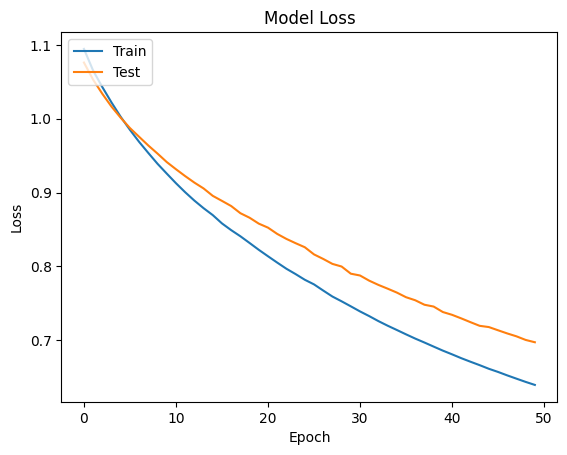

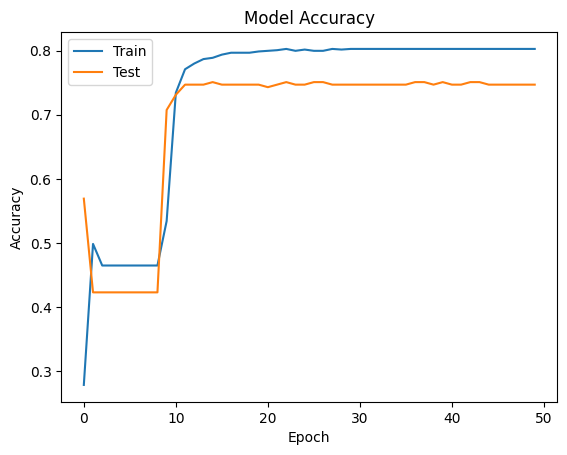

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [29]:
# Save the model
model.save('my_classification_model.keras')


In [30]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,775 (42.09 KB)

 Trainable params: 3,591 (14.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,184 (28.07 KB)

In [32]:
#Add more dropout layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),  # Dropout layer with 50% probability
    Dense(32, activation='relu'),
    Dropout(0.5),  # Another Dropout layer
    Dense(3, activation='softmax')  # Output layer for multiclass classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [33]:
#Using L2 Reguralization to avoid overfitting problem
from tensorflow.keras import regularizers

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(3, activation='softmax')
])


In [35]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]  # Early stopping callback
)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5356 - loss: 1.6588 - val_accuracy: 0.7194 - val_loss: 1.3509
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7491 - loss: 1.2916 - val_accuracy: 0.8419 - val_loss: 1.0914
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8541 - loss: 1.0558 - val_accuracy: 0.8814 - val_loss: 0.9275
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8934 - loss: 0.8904 - val_accuracy: 0.8893 - val_loss: 0.8115
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9056 - loss: 0.7872 - val_accuracy: 0.8893 - val_loss: 0.7206
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9403 - loss: 0.6786 - val_accuracy: 0.9091 - val_loss: 0.6509
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9361 - loss: 0.6188 - val_accuracy: 0.9051 - val_loss: 0.5907
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9418 - loss: 0.5694 - val_accuracy: 0.9328 - val_loss

In [36]:
#Tuning Learning Rate
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)  # Start with a smaller learning rate

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [37]:
#Change the optimizer
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [38]:
#Cross-validation because it can help you get a better estimate of model performance
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5)
scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validated accuracy: {scores.mean()}")


Cross-validated accuracy: 0.9930446776020887


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assume your model is a RandomForestClassifier
model = RandomForestClassifier()

# Fit your model (if not done already)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
test_acc = accuracy_score(y_test, y_pred)

# Print the test accuracy
print(f"Test Accuracy: {test_acc}")


Test Accuracy: 1.0


In [46]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)
print("y_test sample:", y_test[0])
print("y_pred sample:", y_pred[0])


y_test shape: (253, 3)
y_pred shape: (253, 3)
y_test sample: [0. 1. 0.]
y_pred sample: [0. 1. 0.]


In [47]:
from sklearn.metrics import multilabel_confusion_matrix

# Compute the multilabel confusion matrix
mcm = multilabel_confusion_matrix(y_test, y_pred)

# Print the multilabel confusion matrix
print("Multilabel Confusion Matrix:")
print(mcm)


Multilabel Confusion Matrix:
[[[194   0]
  [  0  59]]

 [[146   0]
  [  0 107]]

 [[166   0]
  [  0  87]]]


In [48]:
from sklearn.metrics import classification_report

# Print classification report for a detailed performance analysis
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00       107
           2       1.00      1.00      1.00        87

   micro avg       1.00      1.00      1.00       253
   macro avg       1.00      1.00      1.00       253
weighted avg       1.00      1.00      1.00       253
 samples avg       1.00      1.00      1.00       253



In [49]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation (e.g., 5 folds)
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")


Cross-validation scores: [1.        0.9950495 1.        0.9950495 0.9800995]
Mean cross-validation score: 0.9940397024777103


In [55]:
# Tune Hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")



Best parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.9950347273533323


In [56]:
y_pred = model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00       107
           2       1.00      1.00      1.00        87

   micro avg       1.00      1.00      1.00       253
   macro avg       1.00      1.00      1.00       253
weighted avg       1.00      1.00      1.00       253
 samples avg       1.00      1.00      1.00       253



In [60]:
# Get the column names
column_names = df.columns

# Convert the column names to a list (if needed)
column_names_list = column_names.tolist()

# Print the column names
print(column_names_list)


['Air Temperature (C°)', 'Air Temperature Uncertainty (C°)', 'Wind Direction at 3m (°N)', 'Wind Direction at 3m Uncertainty (°N)', 'Wind Speed at 3m (m/s)', 'Wind Speed at 3m Uncertainty (m/s)', 'Wind Speed at 3m (std dev) (m/s)', 'DHI (Wh/m2)', 'DHI Uncertainty (Wh/m2)', 'Standard Deviation DHI (Wh/m2)', 'DNI (Wh/m2)', 'DNI Uncertainty (Wh/m2)', 'Standard Deviation DNI (Wh/m2)', 'GHI Uncertainty (Wh/m2)', 'Standard Deviation GHI (Wh/m2)', 'Peak Wind Speed at 3m (m/s)', 'Peak Wind Speed at 3m Uncertainty (m/s)', 'Relative Humidity (%)', 'Relative Humidity Uncertainty (%)', 'Barometric Pressure (mB (hPa equiv))', 'Barometric Pressure Uncertainty (mB (hPa equiv))', 'GHI (Wh/m2)', 'Class']


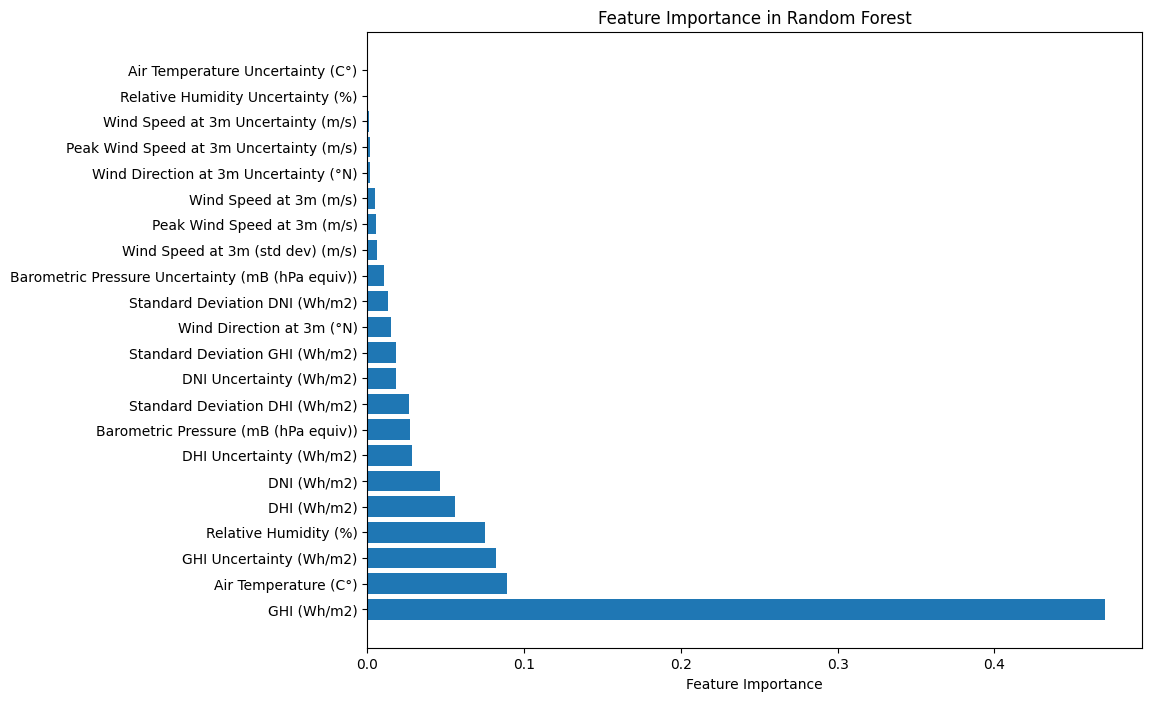

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Example: Assuming 'model' is your trained RandomForestClassifier
# Get the feature importances from the model
feature_importances = model.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Get the sorted column names using the column names list
sorted_column_names = np.array(['Air Temperature (C°)', 'Air Temperature Uncertainty (C°)', 'Wind Direction at 3m (°N)',
                                'Wind Direction at 3m Uncertainty (°N)', 'Wind Speed at 3m (m/s)',
                                'Wind Speed at 3m Uncertainty (m/s)', 'Wind Speed at 3m (std dev) (m/s)',
                                'DHI (Wh/m2)', 'DHI Uncertainty (Wh/m2)', 'Standard Deviation DHI (Wh/m2)',
                                'DNI (Wh/m2)', 'DNI Uncertainty (Wh/m2)', 'Standard Deviation DNI (Wh/m2)',
                                'GHI Uncertainty (Wh/m2)', 'Standard Deviation GHI (Wh/m2)',
                                'Peak Wind Speed at 3m (m/s)', 'Peak Wind Speed at 3m Uncertainty (m/s)',
                                'Relative Humidity (%)', 'Relative Humidity Uncertainty (%)',
                                'Barometric Pressure (mB (hPa equiv))', 'Barometric Pressure Uncertainty (mB (hPa equiv))',
                                'GHI (Wh/m2)'])

# Plotting the feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), sorted_column_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.show()


In [68]:
# Assuming the target column is 'Class'
X = df.drop('Class', axis=1)  # Drop the 'Class' column from features
y = df['Class']  # Define target variable as 'Class'


In [69]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (1009, 22)
X_test shape: (253, 22)


In [70]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier()

In [71]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [72]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [74]:
from sklearn.metrics import accuracy_score

# Predicting on the training data
y_train_pred = model.predict(X_train)

# Calculating the accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Predicting on the test data
y_test_pred = model.predict(X_test)

# Calculating the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 1.0
Test Accuracy: 1.0


In [75]:
#Model comparison
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Compare accuracy of both models
rf_accuracy = accuracy_score(y_test, model.predict(X_test))
gb_accuracy = accuracy_score(y_test, gb_model.predict(X_test))

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Gradient Boosting Accuracy: {gb_accuracy}")


Random Forest Accuracy: 1.0
Gradient Boosting Accuracy: 1.0


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Hyperparameters tuning
model = RandomForestClassifier(
    n_estimators=100,           # Number of trees
    max_depth=10,               # Maximum depth of trees
    min_samples_split=10,       # Minimum samples to split a node
    min_samples_leaf=5,         # Minimum samples per leaf node
    max_features='sqrt',       # Number of features to consider for splits
    random_state=42            # Ensuring reproducibility
)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Cross-validation to evaluate the model
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

# Evaluate on test data
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Cross-validation scores: [0.9950495  0.9950495  1.         0.9950495  0.97512438]
Mean cross-validation score: 0.9920545785921876
Test Accuracy: 1.0


In [78]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test data
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Classification Report (Precision, Recall, F1-score)
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")




Confusion Matrix:
[[ 59   0   0]
 [  0 107   0]
 [  0   0  87]]
Classification Report:
              precision    recall  f1-score   support

  Inspecting       1.00      1.00      1.00        59
  Monitoring       1.00      1.00      1.00       107
     Running       1.00      1.00      1.00        87

    accuracy                           1.00       253
   macro avg       1.00      1.00      1.00       253
weighted avg       1.00      1.00      1.00       253



In [79]:
from sklearn.metrics import accuracy_score

# Predicting on the training data
y_train_pred = model.predict(X_train)

# Calculating the accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Predicting on the test data
y_test_pred = model.predict(X_test)

# Calculating the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 1.0
Test Accuracy: 1.0


In [80]:
import joblib

# Save the model to a .pkl file
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']